In [1]:
import numpy as np
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
#from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import contextily as ctx
#import ulmo
import datetime as dt
from datetime import datetime
#from shapely.geometry import Point
#import metloom
#from metloom.pointdata import CDECPointData
#from metloom.pointdata import SnotelPointData
#from metloom.variables import CdecStationVariables
import pickle
import scipy.stats as stats
# SVD function from scipy
from scipy.linalg import svd
#import sklearn
#from sklearn.cluster import KMeans

import rioxarray as rxr
import xarray as xr
import rasterio as rio
import matplotlib
#import regionmask

In [2]:
wstates_boundary = gpd.read_file('../data/misc/western_boundary.geojson')

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/yr/1f67jccn6hl_lyxnqy7qjpq40000gp/T/ipykernel_10226/3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [4]:
# def preprocess(ds):
#     ## set spatial reference ##
#     ds.rio.write_crs('EPSG:4326',inplace = True)
#     ds = ds.rio.set_spatial_dims('lon','lat',inplace=True)
#     return ds

ars = xr.open_dataset('../data/dataverse_files/NCEP-NCAR/globalARcatalog_NCEP-NCAR_1948-2021_v3.0.nc')

In [5]:
ars.coords['lon'] = (ars.coords['lon'] + 180) % 360 - 180
ars = ars.sortby(ars.lon)

In [11]:
#ars = ars.rio.set_spatial_dims('lon','lat',inplace=True)

In [6]:
clusters = xr.open_dataset('../data/swe_reanalysis_5clusters.nc')
clusters = clusters.__xarray_dataarray_variable__

In [142]:
clusters

<xarray.DataArray '__xarray_dataarray_variable__' (y: 506, x: 646)>
[326876 values with dtype=float64]
Coordinates:
  * y        (y) float64 31.02 31.05 31.09 31.12 ... 48.87 48.9 48.94 48.97
  * x        (x) float64 -125.0 -124.9 -124.9 -124.9 ... -102.1 -102.1 -102.0

/var/folders/yr/1f67jccn6hl_lyxnqy7qjpq40000gp/T/ipykernel_6932/1047989789.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  clusters.plot(cmap = plt.cm.get_cmap(cmap, 6), ax=ax, add_colorbar=True)


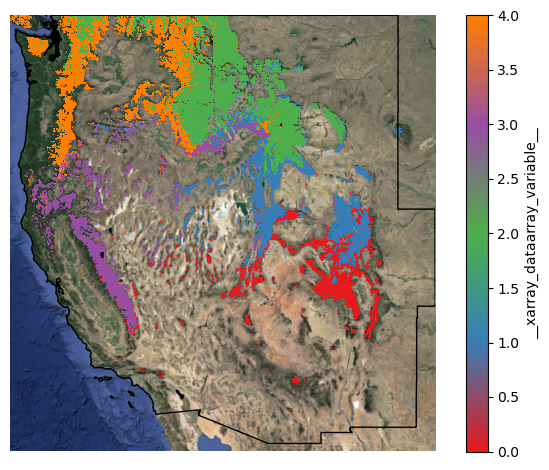

In [144]:
from matplotlib.colors import LinearSegmentedColormap
colors=['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00'] #,'#ffff33'
cmap = LinearSegmentedColormap.from_list('clusters', colors)
#cmap.set_bad('white',alpha=0)

fig, ax = plt.subplots()

clusters.plot(cmap = plt.cm.get_cmap(cmap, 6), ax=ax, add_colorbar=True)
ctx.add_basemap(ax=ax, crs='epsg:4326', source='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}', zoom=8, attribution=False)
wstates_boundary.to_crs('epsg:4326').plot(ax=ax, facecolor='none',edgecolor='k')

plt.axis('off')
plt.tight_layout()

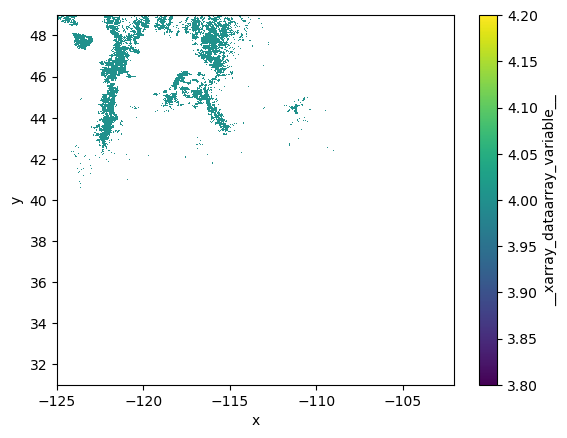

In [154]:
clusters.where(clusters==4).plot()

In [85]:
ars.sel(time=slice("1996-12-25", "1997-01-02")).rio.set_crs('epsg:4326')

<xarray.Dataset>
Dimensions:      (lon: 144, lat: 73, lev: 1, time: 36, ens: 1)
Coordinates:
  * lon          (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat          (lat) float64 -90.0 -87.5 -85.0 -82.5 ... 82.5 85.0 87.5 90.0
  * lev          (lev) float64 1e+03
  * time         (time) datetime64[ns] 1996-12-25 ... 1997-01-02T18:00:00
  * ens          (ens) float64 1.0
Data variables: (12/53)
    islnd        (lat, lon) float32 ...
    iscst        (lat, lon) float32 ...
    shapemap     (ens, time, lev, lat, lon) float32 ...
    axismap      (ens, time, lev, lat, lon) float64 ...
    tnsctmap     (ens, time, lev, lat, lon) float64 ...
    lflocmap     (ens, time, lev, lat, lon) float32 ...
    ...           ...
    axisidx      (ens, time, lev, lat, lon) float32 ...
    axislon      (ens, time, lev, lat, lon) float32 ...
    axislat      (ens, time, lev, lat, lon) float32 ...
    xtnsctidx    (ens, time, lev, lat, lon) float32 ...
    numobj       (ens, time, lev, lat, lon) float32 ...
    intblosto    (ens, lev, lat, lon) float64 ...
Attributes:
    title:                 Global Atmospheric River Database
    version:               2022.04.04
    creation_date:         04-Apr-2022 15:52:41
    tARget_version:        1.300
    dimension_convention:  5-d (nlon x nlat x nlev x ntime x nens) variables ...
    references:            (1) Guan, B., and D. E. Waliser (2015), Detection ...

<Axes: >

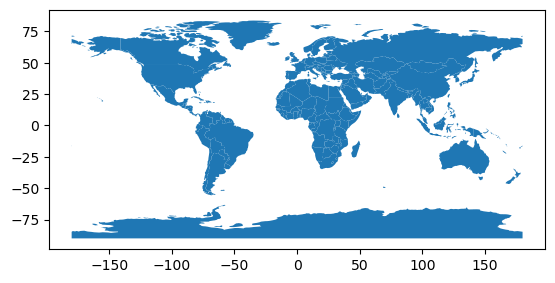

In [88]:
world.plot()

In [91]:
ars

<xarray.Dataset>
Dimensions:      (lon: 144, lat: 73, lev: 1, time: 108116, ens: 1)
Coordinates:
  * lon          (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat          (lat) float64 -90.0 -87.5 -85.0 -82.5 ... 82.5 85.0 87.5 90.0
  * lev          (lev) float64 1e+03
  * time         (time) datetime64[ns] 1948-01-01 ... 2021-12-31T18:00:00
  * ens          (ens) float64 1.0
Data variables: (12/53)
    islnd        (lat, lon) float32 ...
    iscst        (lat, lon) float32 ...
    shapemap     (ens, time, lev, lat, lon) float32 ...
    axismap      (ens, time, lev, lat, lon) float64 ...
    tnsctmap     (ens, time, lev, lat, lon) float64 ...
    lflocmap     (ens, time, lev, lat, lon) float32 ...
    ...           ...
    axisidx      (ens, time, lev, lat, lon) float32 ...
    axislon      (ens, time, lev, lat, lon) float32 ...
    axislat      (ens, time, lev, lat, lon) float32 ...
    xtnsctidx    (ens, time, lev, lat, lon) float32 ...
    numobj       (ens, time, lev, lat, lon) float32 ...
    intblosto    (ens, lev, lat, lon) float64 ...
Attributes:
    title:                 Global Atmospheric River Database
    version:               2022.04.04
    creation_date:         04-Apr-2022 15:52:41
    tARget_version:        1.300
    dimension_convention:  5-d (nlon x nlat x nlev x ntime x nens) variables ...
    references:            (1) Guan, B., and D. E. Waliser (2015), Detection ...

In [108]:
ars.sel(time=slice("1996-12-25", "1997-01-02"))['time'].values

array(['1996-12-25T00:00:00.000000000', '1996-12-25T06:00:00.000000000',
       '1996-12-25T12:00:00.000000000', '1996-12-25T18:00:00.000000000',
       '1996-12-26T00:00:00.000000000', '1996-12-26T06:00:00.000000000',
       '1996-12-26T12:00:00.000000000', '1996-12-26T18:00:00.000000000',
       '1996-12-27T00:00:00.000000000', '1996-12-27T06:00:00.000000000',
       '1996-12-27T12:00:00.000000000', '1996-12-27T18:00:00.000000000',
       '1996-12-28T00:00:00.000000000', '1996-12-28T06:00:00.000000000',
       '1996-12-28T12:00:00.000000000', '1996-12-28T18:00:00.000000000',
       '1996-12-29T00:00:00.000000000', '1996-12-29T06:00:00.000000000',
       '1996-12-29T12:00:00.000000000', '1996-12-29T18:00:00.000000000',
       '1996-12-30T00:00:00.000000000', '1996-12-30T06:00:00.000000000',
       '1996-12-30T12:00:00.000000000', '1996-12-30T18:00:00.000000000',
       '1996-12-31T00:00:00.000000000', '1996-12-31T06:00:00.000000000',
       '1996-12-31T12:00:00.000000000', '1996-12-31

(31.0, 49.0)

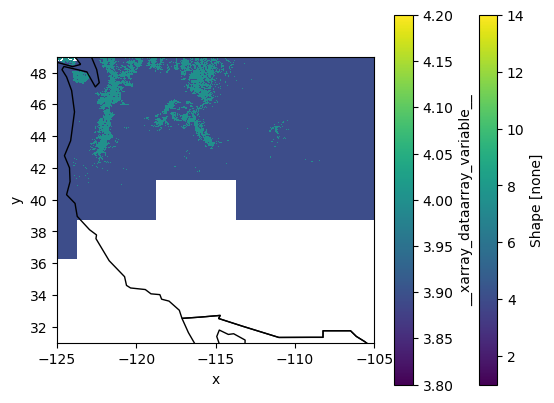

In [12]:
fig, ax = plt.subplots()
ars.sel(time=slice("2006-11-06", "2006-11-07"))['shapemap'][0,7,0,:,:].rio.set_crs('epsg:4326').plot(ax=ax)
clusters.where(clusters==4).plot(ax=ax)
world.plot(ax=ax,facecolor='none', edgecolor='k')
ax.set_xlim(-125,-105)
ax.set_ylim(31,49)
#print(ars.sel(time=slice("2006-11-06", "2006-11-07"))['time'].values)

['2021-11-10T00:00:00.000000000' '2021-11-10T06:00:00.000000000'
 '2021-11-10T12:00:00.000000000' '2021-11-10T18:00:00.000000000'
 '2021-11-11T00:00:00.000000000' '2021-11-11T06:00:00.000000000'
 '2021-11-11T12:00:00.000000000' '2021-11-11T18:00:00.000000000'
 '2021-11-12T00:00:00.000000000' '2021-11-12T06:00:00.000000000'
 '2021-11-12T12:00:00.000000000' '2021-11-12T18:00:00.000000000'
 '2021-11-13T00:00:00.000000000' '2021-11-13T06:00:00.000000000'
 '2021-11-13T12:00:00.000000000' '2021-11-13T18:00:00.000000000'
 '2021-11-14T00:00:00.000000000' '2021-11-14T06:00:00.000000000'
 '2021-11-14T12:00:00.000000000' '2021-11-14T18:00:00.000000000'
 '2021-11-15T00:00:00.000000000' '2021-11-15T06:00:00.000000000'
 '2021-11-15T12:00:00.000000000' '2021-11-15T18:00:00.000000000'
 '2021-11-16T00:00:00.000000000' '2021-11-16T06:00:00.000000000'
 '2021-11-16T12:00:00.000000000' '2021-11-16T18:00:00.000000000']


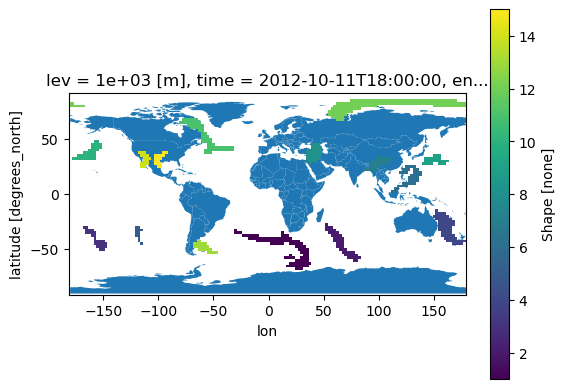

In [129]:
fig, ax = plt.subplots()
world.plot(ax=ax)
ars.sel(time=slice("2012-10-10", "2012-10-16"))['shapemap'][0,7,0,:,:].rio.set_crs('epsg:4326').plot(ax=ax)
print(ars.sel(time=slice("2021-11-10", "2021-11-16"))['time'].values)

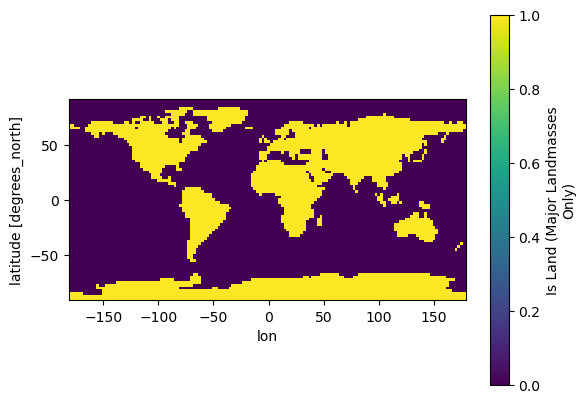

In [96]:
fig, ax = plt.subplots()
world.plot(ax=ax)
ars.sel(time=slice("1996-12-25", "1997-01-02"))['islnd'].rio.set_crs('epsg:4326').plot(ax=ax)

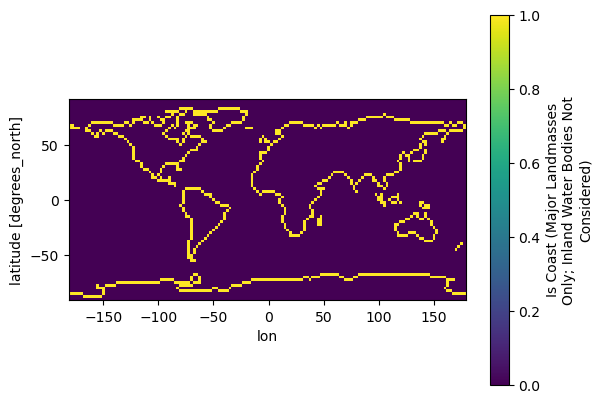

In [97]:
fig, ax = plt.subplots()
world.plot(ax=ax)
ars.sel(time=slice("1996-12-25", "1997-01-02"))['iscst'].rio.set_crs('epsg:4326').plot(ax=ax)


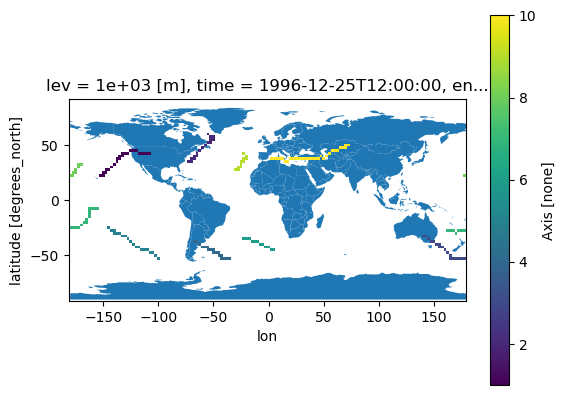

In [98]:
fig, ax = plt.subplots()
world.plot(ax=ax)
ars.sel(time=slice("1996-12-25", "1997-01-02"))['axismap'][0,2,0,:,:].rio.set_crs('epsg:4326').plot(ax=ax)

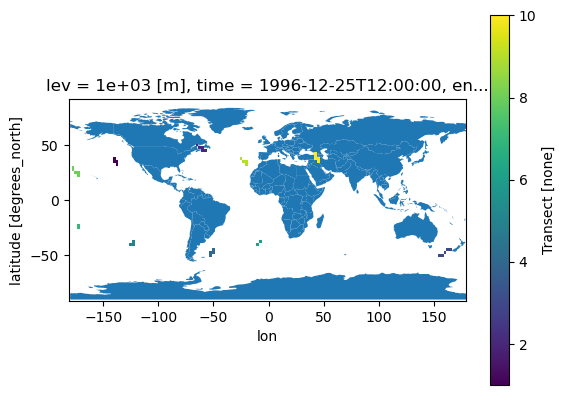

In [99]:
fig, ax = plt.subplots()
world.plot(ax=ax)
ars.sel(time=slice("1996-12-25", "1997-01-02"))['tnsctmap'][0,2,0,:,:].rio.set_crs('epsg:4326').plot(ax=ax)

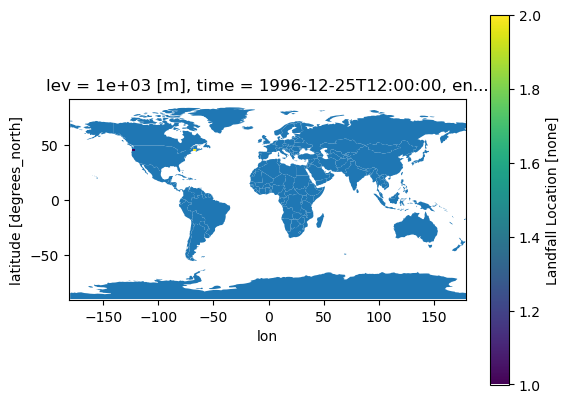

In [100]:
fig, ax = plt.subplots()
world.plot(ax=ax)
ars.sel(time=slice("1996-12-25", "1997-01-02"))['lflocmap'][0,2,0,:,:].rio.set_crs('epsg:4326').plot(ax=ax)

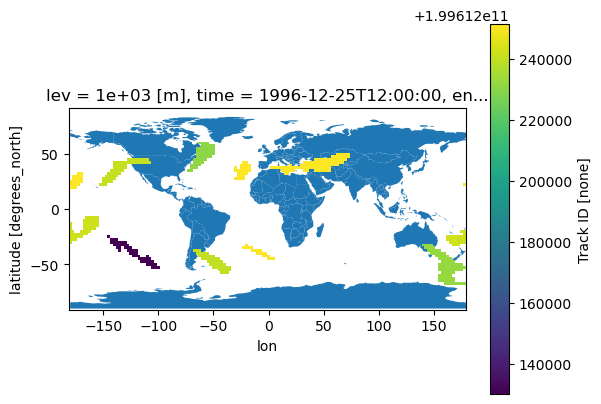

In [102]:
fig, ax = plt.subplots()
world.plot(ax=ax)
ars.sel(time=slice("1996-12-25", "1997-01-02"))['kidmap'][0,2,0,:,:].rio.set_crs('epsg:4326').plot(ax=ax)

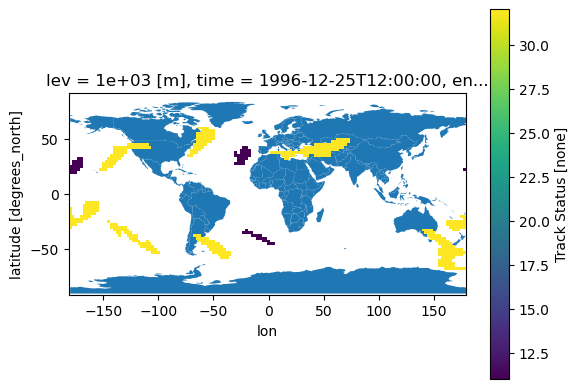

In [103]:
fig, ax = plt.subplots()
world.plot(ax=ax)
ars.sel(time=slice("1996-12-25", "1997-01-02"))['kstatusmap'][0,2,0,:,:].rio.set_crs('epsg:4326').plot(ax=ax)


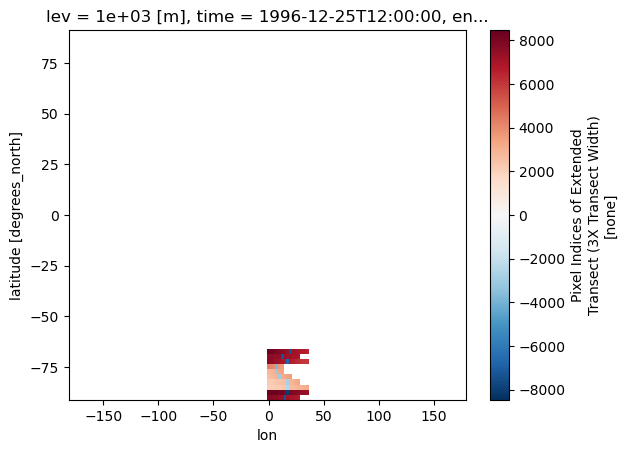

In [111]:
fig, ax = plt.subplots()
#world.plot(ax=ax)
ars.sel(time=slice("1996-12-25", "1997-01-02"))['xtnsctidx'][0,2,0,:,:].rio.set_crs('epsg:4326').plot(ax=ax)


In [7]:
# season slicing code from: https://stackoverflow.com/questions/40272222/select-xarray-pandas-index-based-on-specific-months

def is_cold(month):
    return (month >= 1) & (month <= 4) | (month >= 11)

ars_cold = ars.sel(time=is_cold(ars['time.month']))

['2021-11-10T00:00:00.000000000' '2021-11-10T06:00:00.000000000'
 '2021-11-10T12:00:00.000000000' '2021-11-10T18:00:00.000000000'
 '2021-11-11T00:00:00.000000000' '2021-11-11T06:00:00.000000000'
 '2021-11-11T12:00:00.000000000' '2021-11-11T18:00:00.000000000'
 '2021-11-12T00:00:00.000000000' '2021-11-12T06:00:00.000000000'
 '2021-11-12T12:00:00.000000000' '2021-11-12T18:00:00.000000000'
 '2021-11-13T00:00:00.000000000' '2021-11-13T06:00:00.000000000'
 '2021-11-13T12:00:00.000000000' '2021-11-13T18:00:00.000000000'
 '2021-11-14T00:00:00.000000000' '2021-11-14T06:00:00.000000000'
 '2021-11-14T12:00:00.000000000' '2021-11-14T18:00:00.000000000'
 '2021-11-15T00:00:00.000000000' '2021-11-15T06:00:00.000000000'
 '2021-11-15T12:00:00.000000000' '2021-11-15T18:00:00.000000000'
 '2021-11-16T00:00:00.000000000' '2021-11-16T06:00:00.000000000'
 '2021-11-16T12:00:00.000000000' '2021-11-16T18:00:00.000000000']


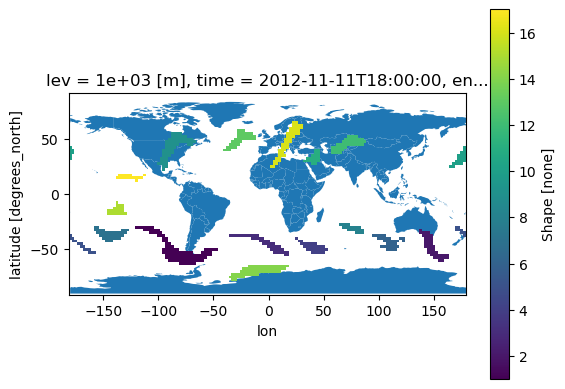

In [9]:
fig, ax = plt.subplots()
world.plot(ax=ax)
ars_cold.sel(time=slice("2012-11-10", "2012-11-16"))['shapemap'][0,7,0,:,:].rio.set_crs('epsg:4326').plot(ax=ax)
print(ars.sel(time=slice("2021-11-10", "2021-11-16"))['time'].values)

In [9]:
# ax.set_xlim(-125,-105)
# ax.set_ylim(31,49)

ars_cold_western = ars_cold.sel(lon=slice(-125, -105), lat=slice(31, 49))

['1991-11-10T00:00:00.000000000' '1991-11-10T06:00:00.000000000'
 '1991-11-10T12:00:00.000000000' '1991-11-10T18:00:00.000000000'
 '1991-11-11T00:00:00.000000000' '1991-11-11T06:00:00.000000000'
 '1991-11-11T12:00:00.000000000' '1991-11-11T18:00:00.000000000'
 '1991-11-12T00:00:00.000000000' '1991-11-12T06:00:00.000000000'
 '1991-11-12T12:00:00.000000000' '1991-11-12T18:00:00.000000000'
 '1991-11-13T00:00:00.000000000' '1991-11-13T06:00:00.000000000'
 '1991-11-13T12:00:00.000000000' '1991-11-13T18:00:00.000000000'
 '1991-11-14T00:00:00.000000000' '1991-11-14T06:00:00.000000000'
 '1991-11-14T12:00:00.000000000' '1991-11-14T18:00:00.000000000'
 '1991-11-15T00:00:00.000000000' '1991-11-15T06:00:00.000000000'
 '1991-11-15T12:00:00.000000000' '1991-11-15T18:00:00.000000000'
 '1991-11-16T00:00:00.000000000' '1991-11-16T06:00:00.000000000'
 '1991-11-16T12:00:00.000000000' '1991-11-16T18:00:00.000000000']


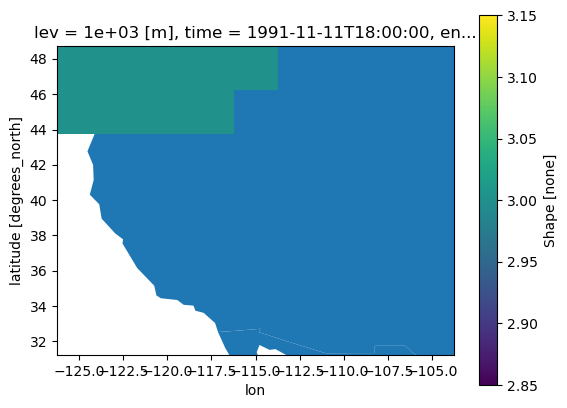

In [15]:
fig, ax = plt.subplots()
world.plot(ax=ax)
ars_cold_western.sel(time=slice("1991-11-10", "1991-11-16"))['shapemap'][0,7,0,:,:].rio.set_crs('epsg:4326').plot(ax=ax)
print(ars_cold_western.sel(time=slice("1991-11-10", "1991-11-16"))['time'].values)

In [10]:
# season slicing code from: https://stackoverflow.com/questions/40272222/select-xarray-pandas-index-based-on-specific-months

def years(year):
    return (year >= 1990)

ars_cold_30 = ars_cold_western.sel(time=years(ars_cold_western['time.year']))

In [19]:
ars_cold_30

<xarray.Dataset>
Dimensions:      (lon: 9, lat: 7, lev: 1, time: 23200, ens: 1)
Coordinates:
  * lon          (lon) float64 -125.0 -122.5 -120.0 ... -110.0 -107.5 -105.0
  * lat          (lat) float64 32.5 35.0 37.5 40.0 42.5 45.0 47.5
  * lev          (lev) float64 1e+03
  * time         (time) datetime64[ns] 1990-01-01 ... 2021-12-31T18:00:00
  * ens          (ens) float64 1.0
Data variables: (12/53)
    islnd        (lat, lon) float32 ...
    iscst        (lat, lon) float32 ...
    shapemap     (ens, time, lev, lat, lon) float32 ...
    axismap      (ens, time, lev, lat, lon) float64 ...
    tnsctmap     (ens, time, lev, lat, lon) float64 ...
    lflocmap     (ens, time, lev, lat, lon) float32 ...
    ...           ...
    axisidx      (ens, time, lev, lat, lon) float32 ...
    axislon      (ens, time, lev, lat, lon) float32 ...
    axislat      (ens, time, lev, lat, lon) float32 ...
    xtnsctidx    (ens, time, lev, lat, lon) float32 ...
    numobj       (ens, time, lev, lat, lon) float32 ...
    intblosto    (ens, lev, lat, lon) float64 ...
Attributes:
    title:                 Global Atmospheric River Database
    version:               2022.04.04
    creation_date:         04-Apr-2022 15:52:41
    tARget_version:        1.300
    dimension_convention:  5-d (nlon x nlat x nlev x ntime x nens) variables ...
    references:            (1) Guan, B., and D. E. Waliser (2015), Detection ...

In [20]:
ars_cold_30.shapemap

<xarray.DataArray 'shapemap' (ens: 1, time: 23200, lev: 1, lat: 7, lon: 9)>
[1461600 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -125.0 -122.5 -120.0 -117.5 ... -110.0 -107.5 -105.0
  * lat      (lat) float64 32.5 35.0 37.5 40.0 42.5 45.0 47.5
  * lev      (lev) float64 1e+03
  * time     (time) datetime64[ns] 1990-01-01 ... 2021-12-31T18:00:00
  * ens      (ens) float64 1.0
Attributes:
    long_name:  Shape
    units:      none

In [25]:
interp = ars_cold_western.sel(time=slice("2006-11-06", "2006-11-07"))['shapemap'].interp(lat=clusters["y"], lon=clusters["x"], method='linear')

In [14]:
interp

<xarray.DataArray 'shapemap' (ens: 1, time: 8, lev: 1, y: 506, x: 646)>
array([[[[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]],


        [[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]],


        [[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
...
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]],


        [[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]],


        [[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]]]])
Coordinates:
  * lev      (lev) float64 1e+03
  * time     (time) datetime64[ns] 1991-11-10 ... 1991-11-11T18:00:00
  * ens      (ens) float64 1.0
    lat      (y) float64 31.02 31.05 31.09 31.12 ... 48.87 48.9 48.94 48.97
    lon      (x) float64 -125.0 -124.9 -124.9 -124.9 ... -102.1 -102.1 -102.0
  * y        (y) float64 31.02 31.05 31.09 31.12 ... 48.87 48.9 48.94 48.97
  * x        (x) float64 -125.0 -124.9 -124.9 -124.9 ... -102.1 -102.1 -102.0
Attributes:
    long_name:  Shape
    units:      none

['2006-11-06T00:00:00.000000000' '2006-11-06T06:00:00.000000000'
 '2006-11-06T12:00:00.000000000' '2006-11-06T18:00:00.000000000'
 '2006-11-07T00:00:00.000000000' '2006-11-07T06:00:00.000000000'
 '2006-11-07T12:00:00.000000000' '2006-11-07T18:00:00.000000000']


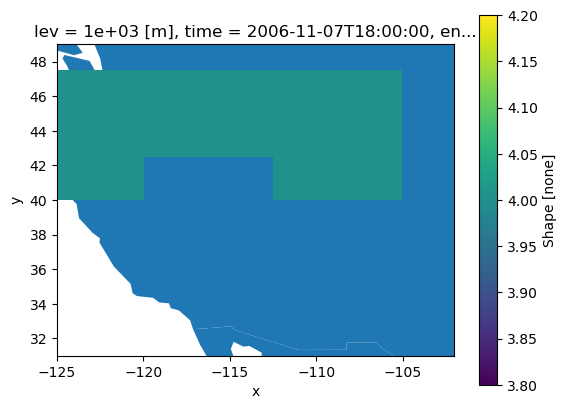

In [26]:
fig, ax = plt.subplots()
world.plot(ax=ax)
interp[0,7,0,:,:].rio.set_crs('epsg:4326').plot(ax=ax)
print(interp.time.values)

['2006-11-06T00:00:00.000000000' '2006-11-06T06:00:00.000000000'
 '2006-11-06T12:00:00.000000000' '2006-11-06T18:00:00.000000000'
 '2006-11-07T00:00:00.000000000' '2006-11-07T06:00:00.000000000'
 '2006-11-07T12:00:00.000000000' '2006-11-07T18:00:00.000000000']


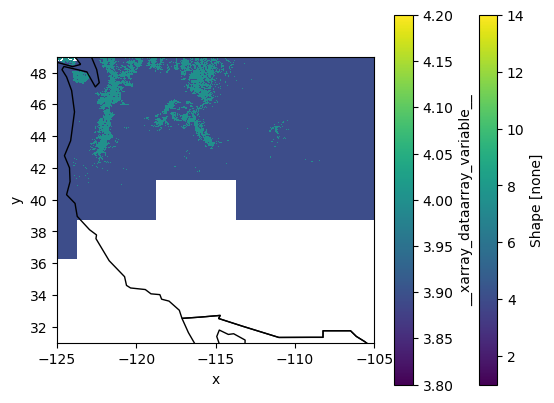

In [21]:
fig, ax = plt.subplots()
ars.sel(time=slice("2006-11-06", "2006-11-07"))['shapemap'][0,7,0,:,:].rio.set_crs('epsg:4326').plot(ax=ax)
clusters.where(clusters==4).plot(ax=ax)
world.plot(ax=ax,facecolor='none', edgecolor='k')
ax.set_xlim(-125,-105)
ax.set_ylim(31,49)
print(ars.sel(time=slice("2006-11-06", "2006-11-07"))['time'].values)

My interpolation attempts aren't working, probably because of nan values? Ask Ross how to do some sort of overlap method that would give higher-resolution cells from 'clusters' a new variable with data from overlapping cells from ARs. This method should accomodate nan values within each time step at different locations.

In [ ]:
interp_ars = ars_cold_30.shapemap.interp(lat=clusters["y"], lon=clusters["x"])

In [22]:
ars

<xarray.Dataset>
Dimensions:      (lon: 144, lat: 73, lev: 1, time: 108116, ens: 1)
Coordinates:
  * lon          (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat          (lat) float64 -90.0 -87.5 -85.0 -82.5 ... 82.5 85.0 87.5 90.0
  * lev          (lev) float64 1e+03
  * time         (time) datetime64[ns] 1948-01-01 ... 2021-12-31T18:00:00
  * ens          (ens) float64 1.0
Data variables: (12/53)
    islnd        (lat, lon) float32 ...
    iscst        (lat, lon) float32 ...
    shapemap     (ens, time, lev, lat, lon) float32 ...
    axismap      (ens, time, lev, lat, lon) float64 ...
    tnsctmap     (ens, time, lev, lat, lon) float64 ...
    lflocmap     (ens, time, lev, lat, lon) float32 ...
    ...           ...
    axisidx      (ens, time, lev, lat, lon) float32 ...
    axislon      (ens, time, lev, lat, lon) float32 ...
    axislat      (ens, time, lev, lat, lon) float32 ...
    xtnsctidx    (ens, time, lev, lat, lon) float32 ...
    numobj       (ens, time, lev, lat, lon) float32 ...
    intblosto    (ens, lev, lat, lon) float64 ...
Attributes:
    title:                 Global Atmospheric River Database
    version:               2022.04.04
    creation_date:         04-Apr-2022 15:52:41
    tARget_version:        1.300
    dimension_convention:  5-d (nlon x nlat x nlev x ntime x nens) variables ...
    references:            (1) Guan, B., and D. E. Waliser (2015), Detection ...

In [21]:
ars.time.values[0]

numpy.datetime64('1948-01-01T00:00:00.000000000')

In [ ]:
ars.sel(time=slice("1996-12-25", "1997-01-02"))

In [32]:
ars.shapemap.values.T[0].plot()

type: 'numpy.ndarray' object has no attribute 'plot'

In [55]:
ars = ars.drop_indexes(['lev','ens','time'])
ars = ars.reset_coords(names=['lev','ens'])

In [56]:
ars_shapemap = ars.shapemap.T

In [57]:
ars_shapemap

<xarray.DataArray 'shapemap' (lon: 144, lat: 73, lev: 1, time: 108116, ens: 1)>
[1136515392 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
    time     (time) datetime64[ns] 1948-01-01 ... 2021-12-31T18:00:00
Dimensions without coordinates: lev, ens
Attributes:
    long_name:  Shape
    units:      none

In [59]:
ars_shapemap_0 = ars_shapemap[0]

In [60]:
ars_shapemap_0

<xarray.DataArray 'shapemap' (lat: 73, lev: 1, time: 108116, ens: 1)>
[7892468 values with dtype=float32]
Coordinates:
    lon      float64 0.0
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
    time     (time) datetime64[ns] 1948-01-01 ... 2021-12-31T18:00:00
Dimensions without coordinates: lev, ens
Attributes:
    long_name:  Shape
    units:      none

type: pcolormesh() takes 1 or 3 positional arguments but 2 were given

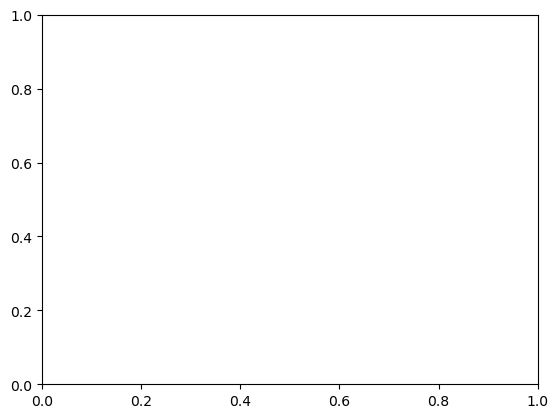

In [63]:
fig, ax = plt.subplots()
ax.pcolormesh(ars_shapemap_0['lon'], ars_shapemap_0['lat'])

In [18]:
ars_shapefile = ars['shapemap']

In [37]:
ars_shapefile = ars_shapefile.T

In [39]:
ars_shapefile

<xarray.DataArray 'shapemap' (lon: 144, lat: 73, lev: 1, time: 108116, ens: 1)>
[1136515392 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lev      (lev) float64 1e+03
  * time     (time) datetime64[ns] 1948-01-01 ... 2021-12-31T18:00:00
  * ens      (ens) float64 1.0
Attributes:
    long_name:  Shape
    units:      none

In [21]:
ars_shapefile = ars_shapefile.rio.set_spatial_dims('lon','lat',inplace=True)

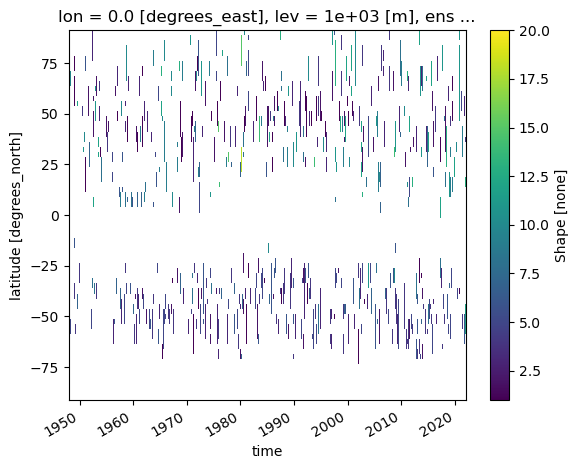

In [38]:
ars_shapefile[0].plot()

(array([7.171219e+06, 4.079976e+06, 3.354622e+06, 3.013786e+06,
        2.440338e+06, 1.360844e+06, 4.768050e+05, 9.626000e+04,
        1.212400e+04, 1.051000e+03]),
 array([ 1.00001,  3.10002,  5.20003,  7.30004,  9.40005, 11.50006,
        13.60007, 15.70008, 17.80009, 19.9001 , 22.00011]),
 <BarContainer object of 10 artists>)

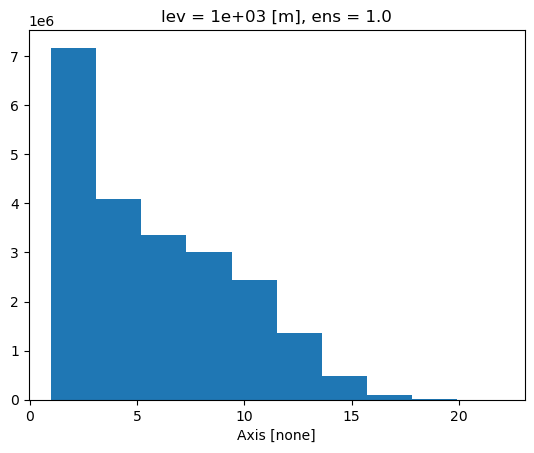

In [27]:
ars.axismap[0].plot()

<Axes: >

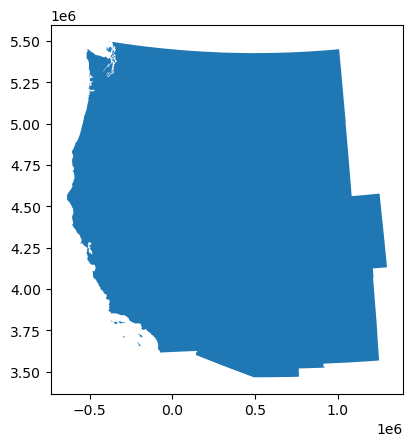

In [6]:
wstates_boundary.plot()

type: tuple index out of range

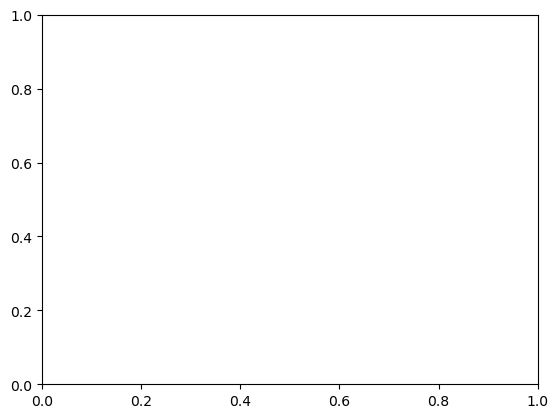

In [34]:
fig, ax = plt.subplots()
ax.pcolormesh(ars['lon'][0], ars['lat'][0], ars['shapemap'][0])